In [ ]:
#data read test

import pandas as pd

df = pd.read_csv('used_cars.csv')

print("data head\n")
print(df.head())

print("\ndata info\n")
print(df.info())

print("\ndata summary\n")
print(df.describe())

print("\nerro num:")
print(df.isnull().sum())

In [ ]:
#data refine

# 'price' 열: '$'와 ',' 제거 후 숫자(float)로 변환
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# 'milage' 열: ' mi.'와 ',' 제거 후 숫자(int)로 변환
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(int)

# 'engine' 열에서 마력(HP) 정보 추출하기 (피처 엔지니어링)
# 'HP' 앞에 있는 숫자(소수점 포함)를 뽑아내는 정규표현식 사용
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP').astype(float)

# 'engine' 열에서 추가 정보 추출
# 'L' 앞에 있는 숫자를 'engine_L'로 추출
df['engine_L'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*L').astype(float)

# 'Cylinder' 또는 'V' 앞에 있는 숫자를 'cylinders'로 추출
df['cylinders'] = df['engine'].str.extract(r'(\d)\s*(?:Cylinder|V)').astype(float)

# 'model_year'를 이용해 'car_age' 피처 생성
current_year = 2025 # 현재 연도
df['car_age'] = current_year - df['model_year']

# 불필요한 열 삭제
df.drop(['engine', 'model_year'], axis=1, inplace=True)

print(df.head())

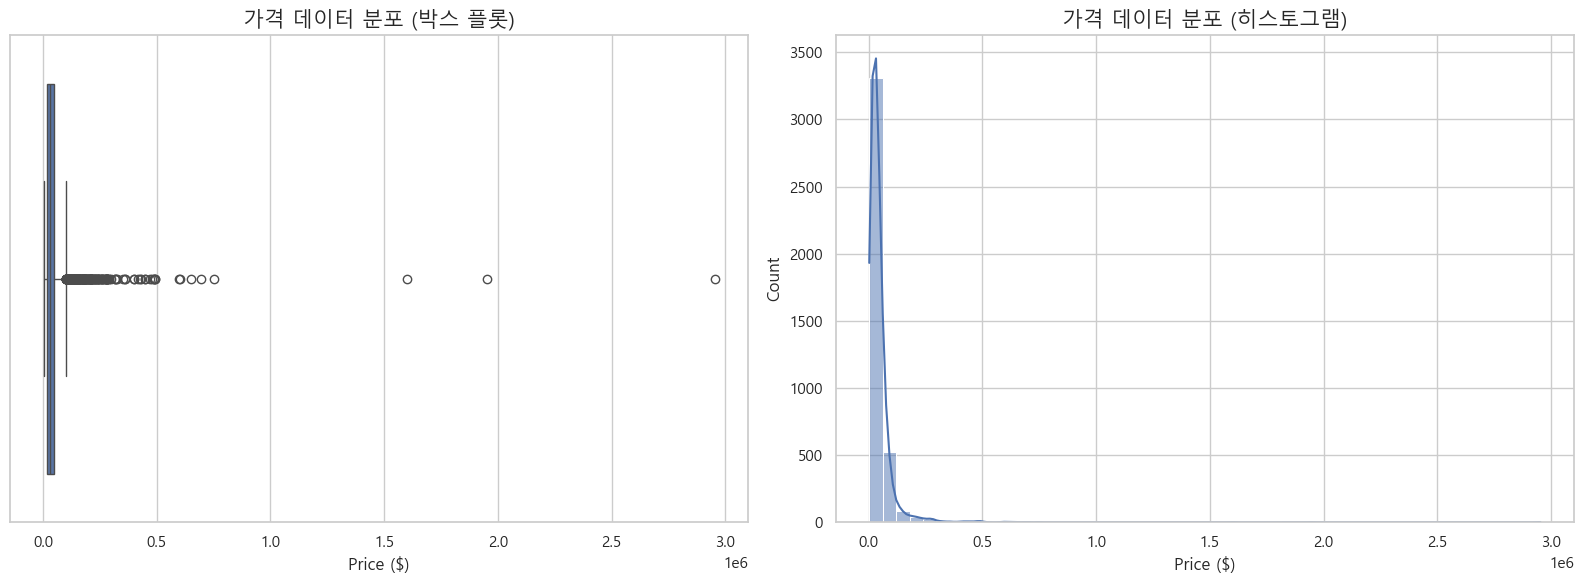

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일과 폰트 설정 (선택 사항, 더 예쁘게 보이기 위함)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# --- 1. 그래프 그릴 준비 ---
# 전체 그림의 크기를 정합니다.
plt.figure(figsize=(16, 6))

# --- 2. 첫 번째 그래프: 박스 플롯 ---
plt.subplot(1, 2, 1) # 1행 2열의 첫 번째 칸에 그림
sns.boxplot(x=df['price'])
plt.title('가격 데이터 분포 (박스 플롯)', fontsize=15)
plt.xlabel('Price ($)')

# --- 3. 두 번째 그래프: 히스토그램 ---
plt.subplot(1, 2, 2) # 1행 2열의 두 번째 칸에 그림
sns.histplot(df['price'], bins=50, kde=True)
plt.title('가격 데이터 분포 (히스토그램)', fontsize=15)
plt.xlabel('Price ($)')

# --- 4. 그래프 보여주기 ---
plt.tight_layout() # 그래프 간격 조절
plt.show()

In [ ]:
# 문자(object) 데이터를 원-핫 인코딩으로 변환

# 변환할 문자열 칼럼 리스트
categorical_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

df = pd.get_dummies(df, columns=categorical_features)

# 최종 데이터 확인
print("\n원-핫 인코딩 후 최종 데이터 샘플:")
print(df.head())

In [ ]:
#data replace - medium, mode

import numpy as np

# 어떤 열에 결측치가 얼마나 있는지 확인
print("결측치 처리 전:")
print(df.isnull().sum())

# 숫자(float, int) 열의 결측치를 '중앙값(median)'으로 채우기
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    median_val = df[col].median()
    df.fillna({col : median_val}, inplace=True)

# 문자(object) 열의 결측치를 '최빈값(mode)'으로 채우기
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df[col].mode()[0] # 최빈값은 여러 개일 수 있어 첫 번째 값을 선택
    df.fillna({col : mode_val}, inplace=True)


# 만약 예측 목표인 'price' 열에 결측치가 있다면, 그 행은 예측할 수 없으므로 삭제하는 것이 좋음
# df.dropna(subset=['price'], inplace=True)

# 모든 결측치가 처리되었는지 최종 확인
print("\n결측치 처리 후:")
print(df.isnull().sum())

In [ ]:
# 문제지와 정답지 분리

from sklearn.model_selection import train_test_split

# 'price'를 제외한 모든 열 = X (문제지, Features)
X = df.drop('price', axis=1) 

# 'price' 열 = y (정답지, Target)
y = df['price'] 

# 훈련용(Train)과 시험용(Test) 데이터 분리

# X와 y를 8:2 비율로 나눔
# random_state는 나눌 때의 규칙을 고정시켜서, 매번 같은 방식으로 나뉘게 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 결과 확인 (선택 사항)
print("--- 데이터 분리 결과 ---")
print("전체 데이터 개수:", len(X))
print("훈련용 데이터(X_train) 개수:", len(X_train))
print("시험용 데이터(X_test) 개수:", len(X_test))

In [ ]:
# 비교할 모델들을 딕셔너리 형태로 준비

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# 각 모델을 훈련시키고 성능을 평가
for name, model in models.items():
    print(f"--- {name} 모델 훈련 및 평가 시작 ---")
    
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 예측
    predictions = model.predict(X_test)
    
    # 성능 평가 (RMSE)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f"{name} 모델의 예측 오차(RMSE): ${rmse:.2f}\n")

    # 성능 평가(MAE)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{name} 모델의 현실적인 평균 오차(MAE): ${mae:.2f}\n")